# Feature Selection 
---
Reducing the dimensionality


In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import pandas as pd
import numpy as np
import seaborn as sns
import joblib
import matplotlib as plt

from sklearn.metrics import classification_report, plot_confusion_matrix, plot_roc_curve, accuracy_score, confusion_matrix

import eli5
from eli5.sklearn import PermutationImportance
from sklearn.svm import SVC
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier


In [3]:
import sys

gdrive_project_root = '../' 
is_cloud = False

if 'google.colab' in sys.modules:
    is_cloud = True
    from google.colab import drive
    # define project root / change to match your path
    path_mv = "drive/MyDrive/01-Education/03-PhD/2021/Courses/HCI/hci_code/"
    path_mg = "drive/MyDrive/HCI/hci_code/"
    path_nj = ""

    # change to your private path
    gdrive_project_root = path_mv
    drive.mount('/content/drive', force_remount=True)  

In [4]:
X = pd.read_csv(gdrive_project_root  + 'data/processed/2nd_dataset/3_cls_model_input/X_3cls.csv')
y = pd.read_csv(gdrive_project_root + 'data/processed/2nd_dataset/3_cls_model_input/y_3cls.csv')
X_train = pd.read_csv(gdrive_project_root + 'data/processed/2nd_dataset/3_cls_model_input/X_train_3cls.csv')
X_test = pd.read_csv(gdrive_project_root + 'data/processed/2nd_dataset/3_cls_model_input/X_test_3cls.csv')
y_train = pd.read_csv(gdrive_project_root + 'data/processed/2nd_dataset/3_cls_model_input/y_train_3cls.csv')
y_test = pd.read_csv(gdrive_project_root + 'data/processed/2nd_dataset/3_cls_model_input/y_test_3cls.csv')

In [5]:
clf = joblib.load(gdrive_project_root + 'models/CLF_3classes_GBM-AASTR-ODG_RandomForest_100estimators_42_random_state.pkl')

/raid/home/vukovic/anaconda3/envs/hci2/lib/python3.9/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.22.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/raid/home/vukovic/anaconda3/envs/hci2/lib/python3.9/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.22.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [6]:
predictions = clf.predict(X_test)
print("Model accuracy: %s \n" % accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

Model accuracy: 0.76953125 

              precision    recall  f1-score   support

           1       0.83      0.94      0.88       177
           2       0.48      0.29      0.36        45
           3       0.64      0.53      0.58        34

    accuracy                           0.77       256
   macro avg       0.65      0.59      0.61       256
weighted avg       0.74      0.77      0.75       256



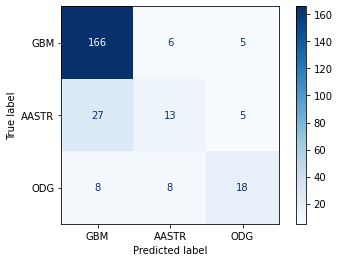

In [7]:
plot_confusion_matrix(clf, X_test, y_test, cmap = plt.cm.Blues, display_labels=["GBM", "AASTR", "ODG"], values_format = '')

# Permutation importance feature selection 
---
“permutation importance” or “Mean Decrease Accuracy (MDA)”

http://eli5.readthedocs.io/en/latest/blackbox/permutation_importance.html

Beware! These calculations take long time to run


In [6]:
# let's e.g. select features which increase accuracy by at least 0.005:
sel = SelectFromModel(PermutationImportance(RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1), cv=5), threshold=0.005,).fit(X_train.values, y_train.values.ravel())
X_train2 = sel.transform(X_train.values)
X_test2 = sel.transform(X_test.values)

In [7]:
X_train.columns[sel.get_support()]

Index(['Overall Survival Status', 'Mutation Count',
       'Overall Survival (Months)', 'Sex', 'Somatic Status', 'Diagnosis Age',
       'TP53', 'CIC'],
      dtype='object')

In [8]:
sel.get_params()

{'estimator__cv': 5,
 'estimator__estimator__bootstrap': True,
 'estimator__estimator__ccp_alpha': 0.0,
 'estimator__estimator__class_weight': None,
 'estimator__estimator__criterion': 'gini',
 'estimator__estimator__max_depth': None,
 'estimator__estimator__max_features': 'auto',
 'estimator__estimator__max_leaf_nodes': None,
 'estimator__estimator__max_samples': None,
 'estimator__estimator__min_impurity_decrease': 0.0,
 'estimator__estimator__min_impurity_split': None,
 'estimator__estimator__min_samples_leaf': 1,
 'estimator__estimator__min_samples_split': 2,
 'estimator__estimator__min_weight_fraction_leaf': 0.0,
 'estimator__estimator__n_estimators': 100,
 'estimator__estimator__n_jobs': -1,
 'estimator__estimator__oob_score': False,
 'estimator__estimator__random_state': 42,
 'estimator__estimator__verbose': 0,
 'estimator__estimator__warm_start': False,
 'estimator__estimator': RandomForestClassifier(n_jobs=-1, random_state=42),
 'estimator__n_iter': 5,
 'estimator__random_stat

              precision    recall  f1-score   support

           1       0.82      0.94      0.88       177
           2       0.52      0.33      0.41        45
           3       0.72      0.53      0.61        34

    accuracy                           0.78       256
   macro avg       0.69      0.60      0.63       256
weighted avg       0.75      0.78      0.76       256



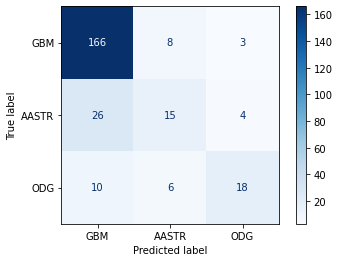

In [9]:
clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
clf.fit(X_train2, y_train.values.ravel()) 
predictions = clf.predict(X_test2)
print(classification_report(y_test, predictions))
plot_confusion_matrix(clf, X_test2, y_test, cmap = plt.cm.Blues, display_labels=["GBM", "AASTR", "ODG"], values_format = '')

In [10]:
pd.Series(clf.feature_importances_, index=X_train.columns[sel.get_support()])

Overall Survival Status      0.038452
Mutation Count               0.187950
Overall Survival (Months)    0.368644
Sex                          0.029495
Somatic Status               0.018785
Diagnosis Age                0.306006
TP53                         0.027363
CIC                          0.023305
dtype: float64

# 2nd iteration 
---
Decreasing the threshold 10x

In [51]:
# let's e.g. select features which increase accuracy by at least 0.005:
sel = SelectFromModel(PermutationImportance(RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1), cv=5), threshold=0.0005,).fit(X_train.values, y_train.values.ravel())
X_train3 = sel.transform(X_train.values)
X_test3 = sel.transform(X_test.values)
X_train.columns[sel.get_support()]

Index(['Overall Survival Status', 'Mutation Count',
       'Overall Survival (Months)', 'Sex', 'Somatic Status', 'Diagnosis Age',
       'TP53', 'TERT', 'ATRX', 'PTEN', 'EGFR', 'CIC', 'NF1', 'TAS2R46', 'TTN',
       'PIK3CA', 'NOTCH1', 'KMT2D', 'SMARCA4', 'KMT2C', 'ARID1B', 'MSH6',
       'FLT4', 'NCOR1', 'CSF1R'],
      dtype='object')

              precision    recall  f1-score   support

           1       0.82      0.93      0.87       177
           2       0.52      0.29      0.37        45
           3       0.57      0.50      0.53        34

    accuracy                           0.76       256
   macro avg       0.64      0.57      0.59       256
weighted avg       0.73      0.76      0.74       256



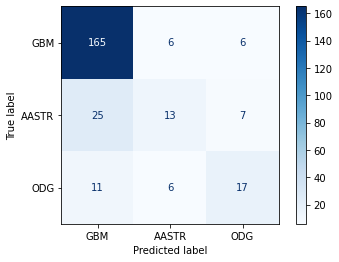

In [52]:
clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
clf.fit(X_train3, y_train.values.ravel()) 
predictions = clf.predict(X_test3)
print(classification_report(y_test, predictions))
plot_confusion_matrix(clf, X_test3, y_test, cmap = plt.cm.Blues, display_labels=["GBM", "AASTR", "ODG"], values_format = '')

In [59]:
pd.Series(clf.feature_importances_, index=X_train.columns[sel.get_support()])


Overall Survival Status      0.039184
Mutation Count               0.172153
Overall Survival (Months)    0.359894
Sex                          0.028524
Somatic Status               0.017377
Diagnosis Age                0.275620
TP53                         0.025784
TERT                         0.002483
ATRX                         0.008155
PTEN                         0.001177
EGFR                         0.008940
CIC                          0.024497
NF1                          0.006949
TAS2R46                      0.003417
TTN                          0.002829
PIK3CA                       0.001250
NOTCH1                       0.008684
KMT2D                        0.003629
SMARCA4                      0.002697
KMT2C                        0.000989
ARID1B                       0.001062
MSH6                         0.002693
FLT4                         0.000638
NCOR1                        0.001043
CSF1R                        0.000333
dtype: float64

# 3rd iteration 
---
Increasing the threshold 10x

In [60]:
# let's e.g. select features which increase accuracy by at least 0.05:
sel = SelectFromModel(PermutationImportance(RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1), cv=5), threshold=0.05,).fit(X_train.values, y_train.values.ravel())
X_train4 = sel.transform(X_train.values)
X_test4 = sel.transform(X_test.values)
X_train.columns[sel.get_support()]

Index(['Overall Survival (Months)', 'Diagnosis Age'], dtype='object')

              precision    recall  f1-score   support

           1       0.81      0.86      0.84       177
           2       0.42      0.42      0.42        45
           3       0.50      0.35      0.41        34

    accuracy                           0.71       256
   macro avg       0.58      0.54      0.56       256
weighted avg       0.70      0.71      0.71       256



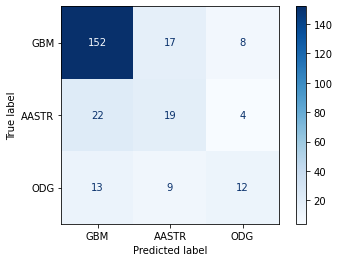

In [61]:
clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
clf.fit(X_train4, y_train.values.ravel()) 
predictions = clf.predict(X_test4)
print(classification_report(y_test, predictions))
plot_confusion_matrix(clf, X_test4, y_test, cmap = plt.cm.Blues, display_labels=["GBM", "AASTR", "ODG"], values_format = '')

In [62]:
pd.Series(clf.feature_importances_, index=X_train.columns[sel.get_support()])


Overall Survival (Months)    0.631728
Diagnosis Age                0.368272
dtype: float64

In [16]:
accuracies = []

____________________ 2 features ____________________

lected features
Index(['Overall Survival (Months)', 'Diagnosis Age'], dtype='object')
              precision    recall  f1-score   support

           1       0.81      0.86      0.84       177
           2       0.42      0.42      0.42        45
           3       0.50      0.35      0.41        34

    accuracy                           0.71       256
   macro avg       0.58      0.54      0.56       256
weighted avg       0.70      0.71      0.71       256

Accuracies: 
[0.71484375, 0.71484375]
____________________ 4 features ____________________

lected features
Index(['Overall Survival Status', 'Mutation Count',
       'Overall Survival (Months)', 'Diagnosis Age'],
      dtype='object')
              precision    recall  f1-score   support

           1       0.81      0.92      0.86       177
           2       0.52      0.33      0.41        45
           3       0.54      0.41      0.47        34

    accuracy             

/raid/home/vukovic/anaconda3/envs/hci2/lib/python3.9/site-packages/sklearn/metrics/_plot/confusion_matrix.py:114: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


Accuracies: 
[0.71484375, 0.71484375, 0.75, 0.80078125, 0.77734375, 0.7734375, 0.76171875, 0.76171875, 0.78125, 0.7734375, 0.79296875, 0.765625]
____________________ 24 features ____________________

lected features
Index(['Overall Survival Status', 'Mutation Count',
       'Overall Survival (Months)', 'Sex', 'Somatic Status', 'Diagnosis Age',
       'TP53', 'ATRX', 'EGFR', 'CIC', 'NF1', 'NOTCH1', 'KMT2D', 'SMARCA4',
       'KMT2C'],
      dtype='object')
              precision    recall  f1-score   support

           1       0.82      0.95      0.88       177
           2       0.52      0.29      0.37        45
           3       0.62      0.47      0.53        34

    accuracy                           0.77       256
   macro avg       0.65      0.57      0.59       256
weighted avg       0.74      0.77      0.74       256

Accuracies: 
[0.71484375, 0.71484375, 0.75, 0.80078125, 0.77734375, 0.7734375, 0.76171875, 0.76171875, 0.78125, 0.7734375, 0.79296875, 0.765625, 0.76953125]
__

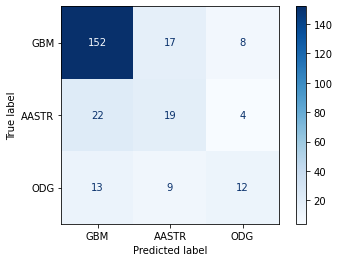

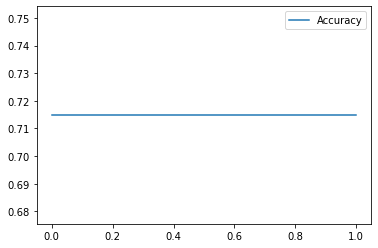

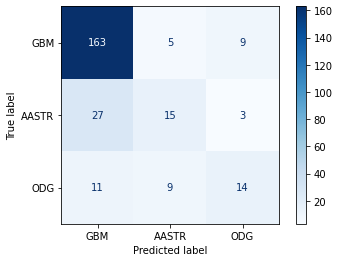

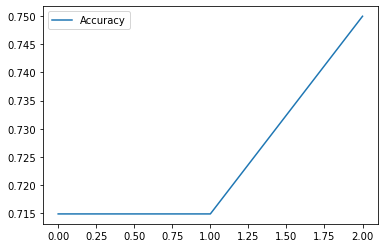

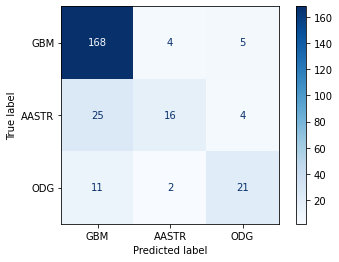

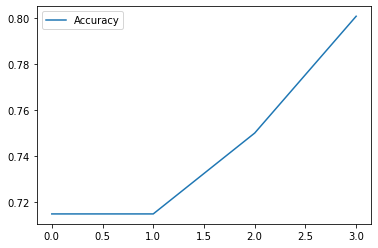

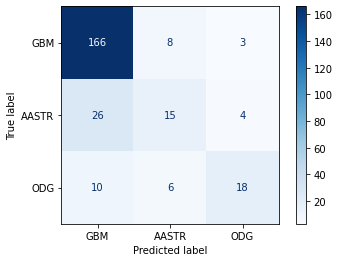

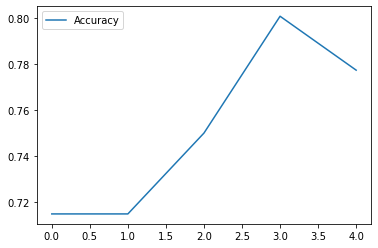

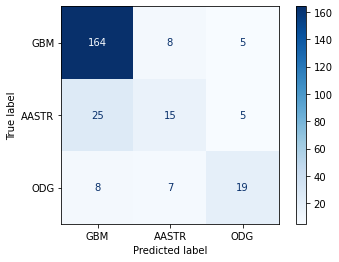

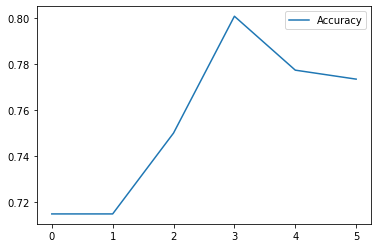

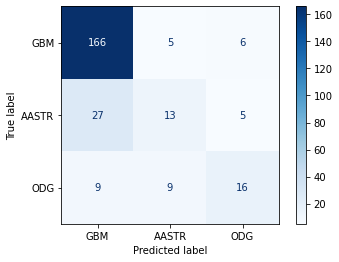

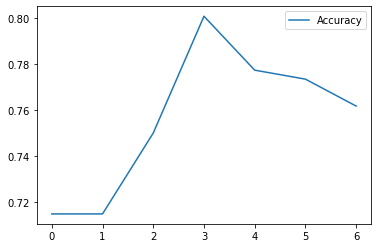

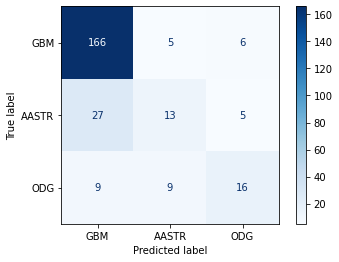

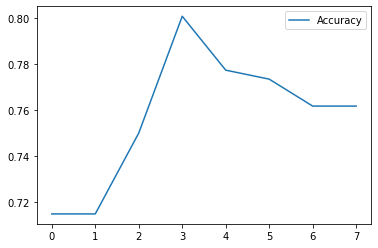

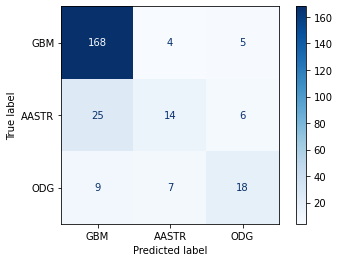

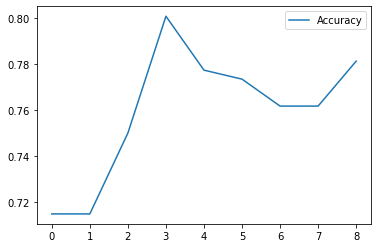

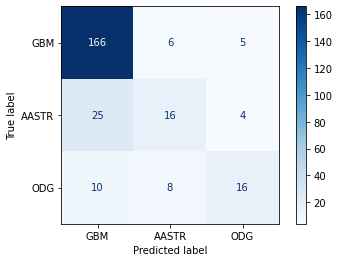

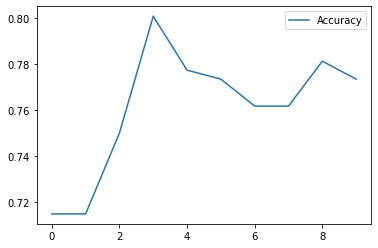

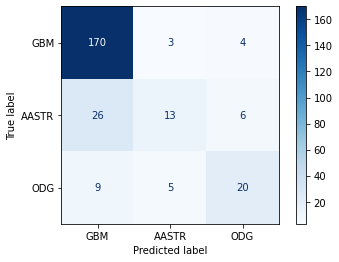

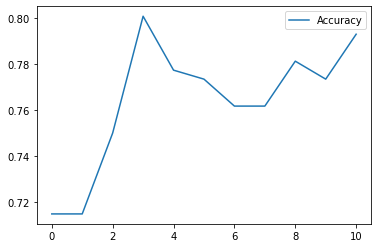

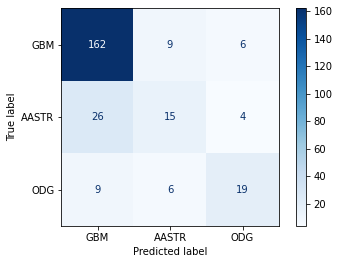

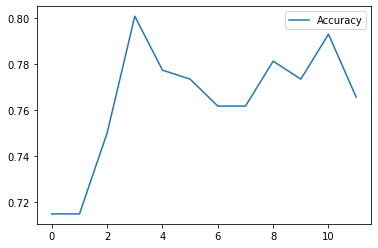

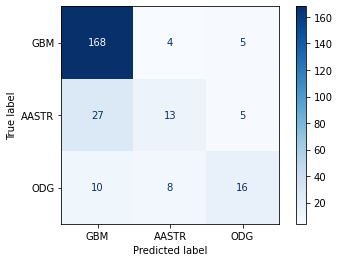

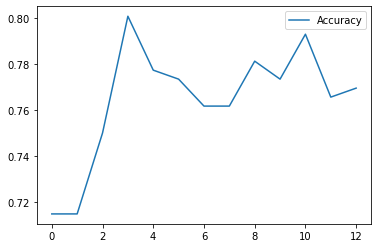

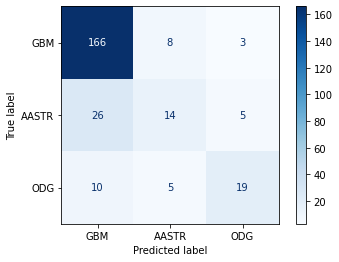

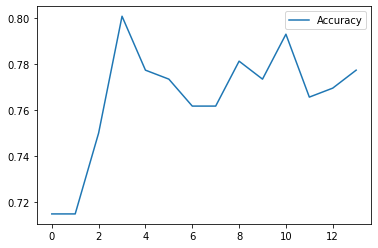

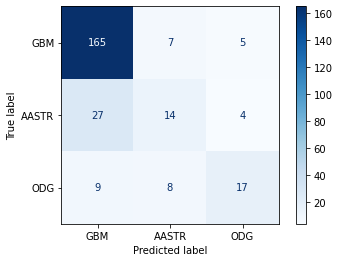

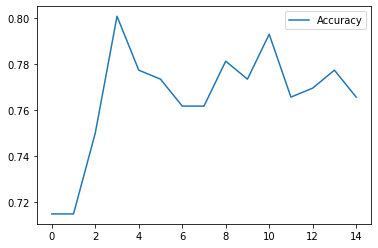

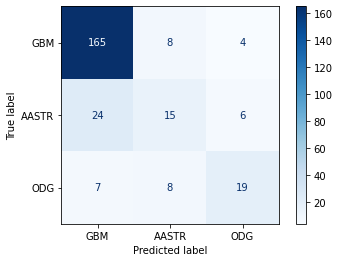

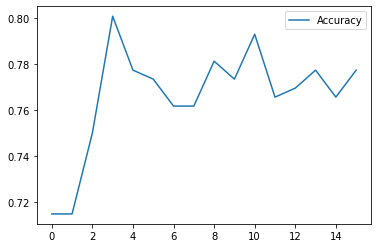

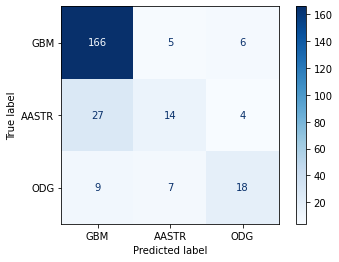

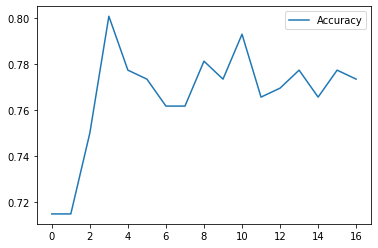

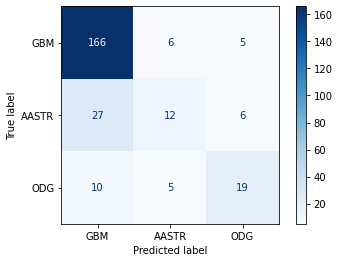

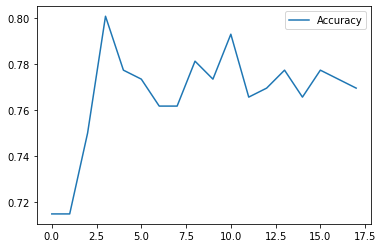

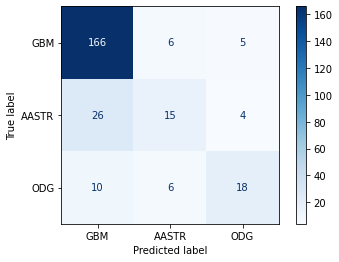

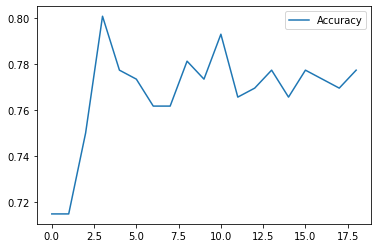

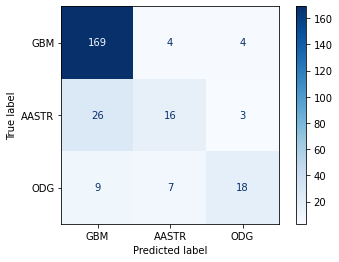

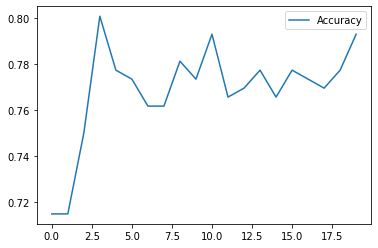

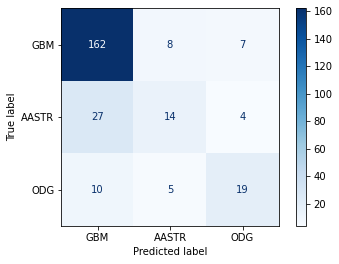

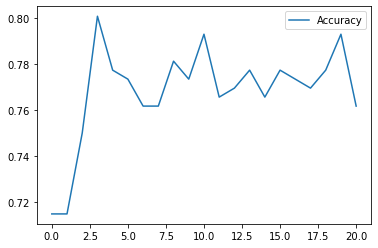

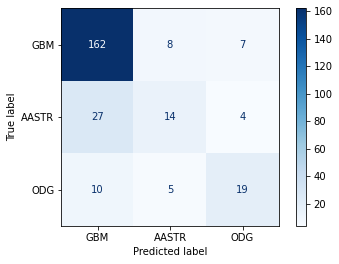

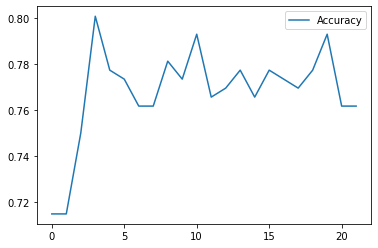

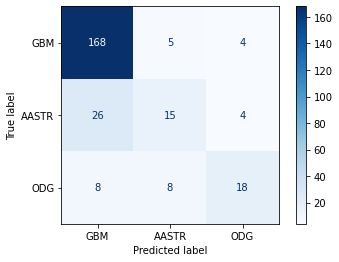

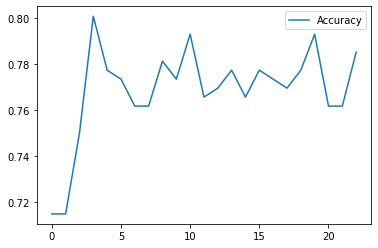

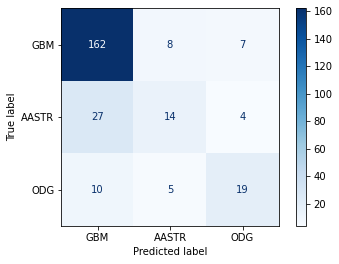

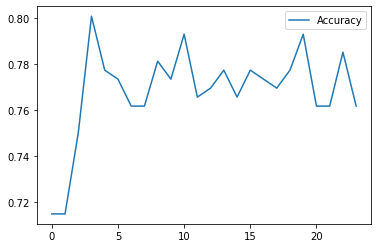

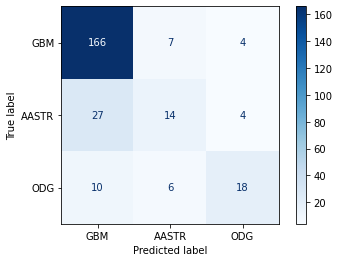

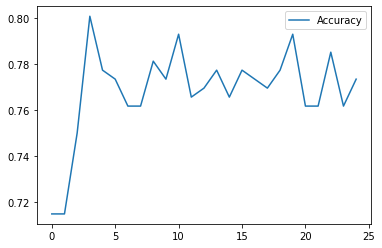

In [21]:
for i in range(2,50, 2):
    print("____________________ {} features ____________________".format(i))
    
    sel = SelectFromModel(PermutationImportance(RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1), cv=5), max_features=i).fit(X_train.values, y_train.values.ravel())
    X_tr = sel.transform(X_train.values)
    X_te = sel.transform(X_test.values)
    
    print('\nlected features')
    print(X_train.columns[sel.get_support()])
    
    
    clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
    clf.fit(X_tr, y_train.values.ravel()) 
    predictions = clf.predict(X_te)
    print(classification_report(y_test, predictions))
    plot_confusion_matrix(clf, X_te, y_test, cmap = plt.cm.Blues, display_labels=["GBM", "AASTR", "ODG"], values_format = '')
    accuracies.append(accuracy_score(y_test, predictions))
    print('Accuracies: ')
    print(accuracies)
    pd.DataFrame({'Accuracy':accuracies}).plot()
    
    

____________________ 20 features ____________________

Slected features

['Overall Survival Status', 'Mutation Count', 'Overall Survival (Months)', 'Sex', 'Somatic Status', 'Diagnosis Age', 'TP53', 'TERT', 'ATRX', 'EGFR', 'CIC', 'NF1', 'PIK3CA', 'NOTCH1', 'KMT2D', 'NCOR1']
       
              precision    recall  f1-score   support

           1       0.83      0.96      0.89       177
           2       0.62      0.29      0.39        45
           3       0.67      0.59      0.62        34

    accuracy                           0.79       256
   macro avg       0.70      0.61      0.64       256
weighted avg       0.77      0.79      0.77       256

Accuracies: 
[0.71484375, 0.71484375, 0.75, 0.80078125, 0.77734375, 0.7734375, 0.76171875, 0.76171875, 0.78125, 0.7734375, 0.79296875]

In [8]:
top20 = ['Overall Survival Status', 'Mutation Count',
       'Overall Survival (Months)', 'Sex', 'Somatic Status', 'Diagnosis Age',
       'TP53', 'TERT', 'ATRX', 'EGFR', 'CIC', 'NF1', 'PIK3CA', 'NOTCH1',
       'KMT2D', 'NCOR1']

              precision    recall  f1-score   support

           1       0.83      0.96      0.89       177
           2       0.62      0.29      0.39        45
           3       0.67      0.59      0.62        34

    accuracy                           0.79       256
   macro avg       0.70      0.61      0.64       256
weighted avg       0.77      0.79      0.77       256



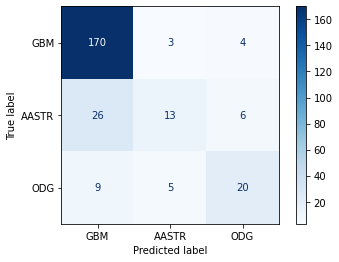

In [9]:
clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
clf.fit(X_train[top20], y_train.values.ravel()) 
predictions = clf.predict(X_test[top20])
print(classification_report(y_test, predictions))
plot_confusion_matrix(clf, X_test[top20], y_test, cmap = plt.cm.Blues, display_labels=["GBM", "AASTR", "ODG"], values_format = '')

In [16]:
pd.DataFrame({'col_name': clf.feature_importances_}, index=X_test[top20].columns).sort_values(by='col_name', ascending=False)


,col_name
Overall Survival (Months),0.343516
Diagnosis Age,0.299537
Mutation Count,0.177018
Overall Survival Status,0.038121
Sex,0.030935
TP53,0.026421
CIC,0.023499
Somatic Status,0.017790
EGFR,0.009234
NOTCH1,0.008833


# Export model and data

In [17]:
import joblib

# gdrive_project_root + '/data/processed/cancer_data_preprocessed.csv'

joblib.dump(clf, gdrive_project_root+'models/Feature_Selected_CLF_3classes_GBM-AASTR-ODG_RandomForest_100estimators_42_random_state.pkl', compress=9)

['../models/Feature_Selected_CLF_3classes_GBM-AASTR-ODG_RandomForest_100estimators_42_random_state.pkl']

In [18]:
X[top20].to_csv(gdrive_project_root + 'data/processed/2nd_dataset/3_cls_model_input/X_top20_3cls.csv', index=False)
y.to_csv(gdrive_project_root + 'data/processed/2nd_dataset/3_cls_model_input/y_top20_3cls.csv', index=False)
X_train[top20].to_csv(gdrive_project_root + 'data/processed/2nd_dataset/3_cls_model_input/X_top20_train_3cls.csv', index=False)
X_test[top20].to_csv(gdrive_project_root + 'data/processed/2nd_dataset/3_cls_model_input/X_top20_test_3cls.csv', index=False)
y_train.to_csv(gdrive_project_root + 'data/processed/2nd_dataset/3_cls_model_input/y_top20_train_3cls.csv', index=False)
y_test.to_csv(gdrive_project_root + 'data/processed/2nd_dataset/3_cls_model_input/y_top20_test_3cls.csv', index=False)